In [58]:
import requests
import re

In [59]:
from collections import defaultdict

In [60]:
url = r'https://dt.8684.cn/bj'
s=requests.Session()
s.headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36'
data = s.get(url)
data.encoding = 'utf-8'  # 注意加这句，不然会出现中文乱码
info = r'<a href="/bj_x_6c955cb5" class="cm-tt" >.+</a> </li> </ul>'
pattern = re.compile(info)
data = pattern.findall(data.text)
# station2 = station2[0:27]
# print(len(station2))
data = data[0].split('北京地铁')
data

['<a href="/bj_x_6c955cb5" class="cm-tt" >',
 '1号线</a> <a href="/bj_z_80ad2f82">苹果园</a> <a href="/bj_z_cd509730">古城</a> <a href="/bj_z_9bb70dd9">八角游乐园</a> <a href="/bj_z_fa25e800">八宝山</a> <a href="/bj_z_5ae32c5d">玉泉路</a> <a href="/bj_z_d9b44e98">五棵松</a> <a href="/bj_z_21a6d77c">万寿路</a> <a href="/bj_z_05ac2d01">公主坟</a> <a href="/bj_z_67c51f59">军事博物馆</a> <a href="/bj_z_b6aa0770">木樨地</a> <a href="/bj_z_e0124a33">南礼士路</a> <a href="/bj_z_f55d3753">复兴门</a> <a href="/bj_z_eea7eaff">西单</a> <a href="/bj_z_06349d64">天安门西</a> <a href="/bj_z_3773ee4f">天安门东</a> <a href="/bj_z_196232d4">王府井</a> <a href="/bj_z_b543b319">东单</a> <a href="/bj_z_bfe94fef">建国门</a> <a href="/bj_z_2a27f433">永安里</a> <a href="/bj_z_31853c10">国贸</a> <a href="/bj_z_55a1b239">大望路</a> <a href="/bj_z_114a4e64">四惠</a> <a href="/bj_z_e2ab626f">四惠东</a> </li> <li class="sLink"> <a href="/bj_x_a595cb4d" class="cm-tt" >',
 '2号线外环</a> <a href="/bj_z_8cf0e1bc">西直门</a> <a href="/bj_z_a48e2f9c">车公庄</a> <a href="/bj_z_0afc7421">阜成门</a> <a hr

In [61]:
line = defaultdict(None)
# 提取出每条路线的名称
for v in data:
    data_pattern = r'(.+线)'
    pattern = re.compile(data_pattern)
    num = pattern.findall(v)
    if num:
        line[num[0]] = [] # 将 路线名 作为 key值
        text = v.split('href=') # 找每条路线的站点
        for v2 in text:
            station_pattern = r'>(.+)</a>'
            pattern = re.compile(station_pattern)
            station = pattern.findall(v2)
            if station:
                line[num[0]].append(station[0])

In [62]:
line

defaultdict(None,
            {'1号线': ['苹果园',
              '古城',
              '八角游乐园',
              '八宝山',
              '玉泉路',
              '五棵松',
              '万寿路',
              '公主坟',
              '军事博物馆',
              '木樨地',
              '南礼士路',
              '复兴门',
              '西单',
              '天安门西',
              '天安门东',
              '王府井',
              '东单',
              '建国门',
              '永安里',
              '国贸',
              '大望路',
              '四惠',
              '四惠东'],
             '2号线': ['西直门',
              '车公庄',
              '阜成门',
              '复兴门',
              '长椿街',
              '宣武门',
              '和平门',
              '前门',
              '崇文门',
              '北京站',
              '建国门',
              '朝阳门',
              '东四十条',
              '东直门',
              '雍和宫',
              '安定门',
              '鼓楼大街',
              '积水潭'],
             '4号线': ['安河桥北',
              '北宫门',
              '西苑',
              '圆明园',
           

In [63]:
# 由于 3号线，11号线，12号线 未开通，所以删除
line['3号线'] = []
line['11号线'] = []
line['12号线'] = []
line['S2号线'] = []
line['八通线'] = []
line['昌平线'] = []
line['房山线'] = []
line['机场线'] = []
line['西郊线'] = []
line['燕房线'] = []
line['亦庄线'] = []

In [64]:
line

defaultdict(None,
            {'1号线': ['苹果园',
              '古城',
              '八角游乐园',
              '八宝山',
              '玉泉路',
              '五棵松',
              '万寿路',
              '公主坟',
              '军事博物馆',
              '木樨地',
              '南礼士路',
              '复兴门',
              '西单',
              '天安门西',
              '天安门东',
              '王府井',
              '东单',
              '建国门',
              '永安里',
              '国贸',
              '大望路',
              '四惠',
              '四惠东'],
             '2号线': ['西直门',
              '车公庄',
              '阜成门',
              '复兴门',
              '长椿街',
              '宣武门',
              '和平门',
              '前门',
              '崇文门',
              '北京站',
              '建国门',
              '朝阳门',
              '东四十条',
              '东直门',
              '雍和宫',
              '安定门',
              '鼓楼大街',
              '积水潭'],
             '4号线': ['安河桥北',
              '北宫门',
              '西苑',
              '圆明园',
           

In [65]:
station_map = defaultdict(list)
# 定义一个函数：使得站点连接起来
def connection_station(station, line_dict):
    for key, value in line_dict.items():
        for i,v in enumerate(value):
            t = str(v)  # ！！！卡在这里好久！！！
            if i == 0:
                station[t].append(value[i+1])
            elif i == len(value)-1:
                station[t].append(value[i-1])
            else:
                station[t].append(value[i+1])
                station[t].append(value[i-1])

In [66]:
connection_station(station_map, line)
station_map

defaultdict(list,
            {'苹果园': ['古城', '杨庄', '金安桥'],
             '古城': ['八角游乐园', '苹果园'],
             '八角游乐园': ['八宝山', '古城'],
             '八宝山': ['玉泉路', '八角游乐园'],
             '玉泉路': ['五棵松', '八宝山'],
             '五棵松': ['万寿路', '玉泉路'],
             '万寿路': ['公主坟', '五棵松'],
             '公主坟': ['军事博物馆', '万寿路', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['木樨地', '公主坟', '白堆子', '北京西站'],
             '木樨地': ['南礼士路', '军事博物馆'],
             '南礼士路': ['复兴门', '木樨地'],
             '复兴门': ['西单', '南礼士路', '长椿街', '阜成门'],
             '西单': ['天安门西', '复兴门', '宣武门', '灵境胡同'],
             '天安门西': ['天安门东', '西单'],
             '天安门东': ['王府井', '天安门西'],
             '王府井': ['东单', '天安门东'],
             '东单': ['建国门', '王府井', '灯市口', '崇文门'],
             '建国门': ['永安里', '东单', '朝阳门', '北京站'],
             '永安里': ['国贸', '建国门'],
             '国贸': ['大望路', '永安里', '金台夕照', '双井'],
             '大望路': ['四惠', '国贸'],
             '四惠': ['四惠东', '大望路'],
             '四惠东': ['四惠'],
             '西直门': ['车公庄', '新街口', '动物园', '大钟寺']

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
station_text = """
苹果园,39.9263251384,116.1777806282
古城,39.9072014648,116.1902475357
八角游乐园,39.9074319023,116.2128210068
八宝山,39.9072673042,116.2358236313
玉泉路,39.9073331435,116.2530326843
五棵松,39.9078269362,116.2740182877
万寿路,39.9074319023,116.2951755524
公主坟,39.9074319023,116.3097667694
军事博物馆,39.9074648219,116.3240146637
木樨地,39.9076294195,116.3374471664
南礼士路,39.9072014648,116.3525962830
复兴门,39.9071685451,116.3565444946
西单,39.9074319023,116.3742685318
天安门西,39.9074648219,116.3917350769
天安门东,39.9077281779,116.4016485214
王府井,39.9080244523,116.4115619659
东单,39.9081890486,116.4179134369
建国门,39.9085182400,116.4358091354
永安里,39.9083865636,116.4504861832
国贸,39.9091436994,116.4619016647
大望路,39.9085182400,116.4770936966
四惠,39.9087157541,116.4954614639
四惠东,39.9085182400,116.5153312683
北京站,39.9049628889,116.4272689819
崇文门,39.9009793597,116.4168834686
前门,39.8999587488,116.3979578018
和平门,39.9000904414,116.3841819763
宣武门,39.8996624396,116.3743114471
长椿街,39.8996295163,116.3630676270
阜成门,39.9233960408,116.3559865952
车公庄,39.9322487730,116.3558149338
西直门,39.9404422892,116.3554716110
积水潭,39.9487335236,116.3731956482
鼓楼大街,39.9478123250,116.3938379288
安定门,39.9491283193,116.4083003998
雍和宫,39.9492599173,116.4169692993
东直门,39.9411332638,116.4336633682
东四十条,39.9338612292,116.4340066910
朝阳门,39.9249428832,116.4346075058
安河桥北,40.0118554028,116.2699842453
北宫门,40.0023554989,116.2776875496
西苑,39.9983283241,116.2909269333
圆明园,39.9994954074,116.3096809387
北京大学东门,39.9921473816,116.3159036636
中关村,39.9838449697,116.3164830208
海淀黄庄,39.9756402091,116.3175773621
人民大学,39.9674015726,116.3213539124
魏公村,39.9578132466,116.3232851028
国家图书馆,39.9432061456,116.3251948357
动物园,39.9382047998,116.3388204575
新街口,39.9405080966,116.3677883148
平安里,39.9336637876,116.3728952408
西四,39.9245808594,116.3734102249
灵境胡同,39.9160892062,116.3737535477
菜市口,39.8894554507,116.3739252090
陶然亭,39.8785388760,116.3743543625
北京南站,39.8648536559,116.3792896271
马家堡,39.8532248377,116.3712644577
角门西,39.8459269952,116.3711357117
公益西桥,39.8370219177,116.3708353043
天通苑北,40.0833908853,116.4129781723
天通苑,40.0752145100,116.4131069183
天通苑南,40.0663146083,116.4129352570
立水桥,40.0530775487,116.4122486115
立水桥南,40.0418420964,116.4146518707
北苑路北,40.0305062112,116.4180421829
大屯路东,40.0038019364,116.4173340797
惠新西街北口,39.9875113077,116.4170658588
惠新西街南口,39.9769967756,116.4174628258
和平西桥,39.9685321828,116.4179724455,
和平里北街,39.9584074165,116.4185062051
北新桥,39.9408618103,116.4168727398
张自忠路,39.9336596743,116.4171463251
东四,39.9243700208,116.4174936712
灯市口,39.9172165503,116.4177873731
磁器口,39.8931227334,116.4187248051
天坛东门,39.8830639907,116.4208289981
蒲黄榆,39.8656647996,116.4215612411
刘家窑,39.8576455856,116.4221245050
宋家庄,39.8457869613,116.4283740520
海淀五路居,39.9325778488,116.2767648697
慈寿寺,39.9330879131,116.2951755524
花园桥,39.9323721766,116.3101047277
白石桥南,39.9330241553,116.3254737854
车公庄西,39.9324719277,116.3439850509
北海北,39.9332730162,116.3867032528
南锣鼓巷,39.9331372740,116.4032471180
东大桥,39.9228797332,116.4517012239
呼家楼,39.9231985690,116.4618426561
金台路,39.9228159658,116.4780861139
十里堡,39.9230689778,116.5018987656
青年路,39.9231615430,116.5175521374
褡裢坡,39.9240213643,116.5634393692
黄渠,39.9241694664,116.5782129765
常营,39.9257574298,116.5995419025
草房,39.9244286443,116.6154688597
俸伯,40.1325679642,116.6849541664
顺义,40.1302465359,116.6568553448
石门,40.1298445844,116.6413360834
南法信,40.1283926174,116.6094338894
后沙峪,40.1140845728,116.5642333031
花梨坎,40.0843923417,116.5576457977
国展,40.0701407233,116.5551674366
孙河,40.0451275079,116.5346109867
马泉营,40.0337675249,116.5038192272
崔各庄,40.0222084635,116.4929187298
望京,39.9987146144,116.4697873592
望京西,39.9959858785,116.4515912533
张郭庄,39.8583147471,116.1871576309
园博园,39.8612301562,116.2019205093
大瓦窑,39.8595830477,116.2395787239
郭庄子,39.8643780825,116.2531399727
大井,39.8652077604,116.2763088942
七里庄,39.8675310111,116.2942126393
西局,39.8664841684,116.3043808937
泥洼,39.8583188650,116.3043862581
丰台站,39.8498560655,116.3050138950
首经贸,39.8444483875,116.3202059269
纪家庙,39.8444154376,116.3332575560
草桥,39.8459434698,116.3511532545
角门西,39.8459414105,116.3711491227
角门东,39.8451444491,116.3849544525
大红门,39.8453750952,116.3988295197
石榴庄,39.8459022834,116.4139866829
成寿寺,39.8458652156,116.4474123716
分钟寺,39.8518740541,116.4539784193
十里河,39.8658089104,116.4590156078
潘家园,39.8754718785,116.4607697725
劲松,39.8844378292,116.4613223076
双井,39.8935590076,116.4616280794
金台夕照,39.9167145964,116.4618426561
团结湖,39.9337296015,116.4618694782
农业展览馆,39.9417090706,116.4621269703
亮马桥,39.9490830824,116.4619070292
三元桥,39.9613658535,116.4568376541
太阳宫,39.9727954429,116.4475035667
芍药居,39.9778107025,116.4361524582
安贞门,39.9769803325,116.4059722424
北土城,39.9766884674,116.3944441080
建德门,39.9767090213,116.3813495636
牡丹园,39.9763184957,116.3699018955
西土城,39.9761869497,116.3538730145
知春路,39.9764705954,116.3399469852
知春里,39.9763143849,116.3286226988
海淀黄庄,39.9760060736,116.3175827265
苏州街,39.9756340428,116.3062664866
巴沟,39.9741726205,116.2940597534
火器营,39.9660160357,116.2890118361
长春桥,39.9583107871,116.2943869829
车道沟,39.9481331009,116.2938773632
西钓鱼台,39.9232973050,116.2976646423
莲花桥,39.8976787809,116.3103997707
六里桥,39.8803337264,116.3027608395
新宫,39.8122529769,116.3655996323
西红门,39.7895938573,116.3287568092
高米店北,39.7733841750,116.3308489323
高米店南,39.7634223137,116.3317823410
枣园,39.7535909846,116.3319754601
清源路,39.7426693062,116.3325119019
黄村西大街,39.7313828531,116.3326191902
黄村火车站,39.7229498085,116.3325762749
义和庄,39.7125019650,116.3190150261
生物医药基地,39.6866148672,116.3222551346
天宫院,39.6702157844,116.3199269772
金安桥,116.169398,39.930086
杨庄,116.194192,39.934174
西黄村,116.213386,39.939411
廖公庄,116.213386,39.939411
田村,116.213386,39.939411
物资学院路,116.645543,39.933087
通州北关,116.668053,39.924687
北运河西,116.695124,39.908773
北运河东,116.713741,39.909261
郝家府,116.724215,39.909286
东夏园,116.740896,39.909493
潞城,116.754799,39.90889
北京西站,116.327811,39.900677
湾子,116.3344,39.895902
达官营,116.342069,39.895671
广安门内,116.364626,39.89543
虎坊桥,116.390654,39.895691
珠市口,116.405037,39.897186
桥湾,116.414901,39.899001
广渠门内,116.440943,39.899616
广渠门外,116.455911,39.899309
九龙山,116.484689,39.899525
大郊亭,116.494711,39.899072
百子湾,116.50382,39.898935
化工,116.510091,39.893222
南楼梓庄,116.507808,39.88078
欢乐谷景区,116.505927,39.872916
垡头,116.518225,39.867184
双合,116.533265,39.866414
焦化厂,116.543631,39.861686
朱辛庄,116.32013,40.110334
育知路,116.333898,40.09371
平西府,116.357247,40.095792
回龙观东大街,116.369753,40.086965
霍营,116.366721,40.077129
育新,116.353997,40.066124
西小口,116.358213,40.052716
永泰庄,116.361159,40.043692
林萃桥,116.378905,40.027995
森林公园南门,116.399036,40.016211
奥林匹克公园,116.398711,40.007852
奥体中心,116.400191,39.992442
安华桥,116.400603,39.974878
安德里北街,116.400884,39.963931
什刹海,116.402547,39.944154
中国美术馆,116.417376,39.93054
郭公庄,116.308567,39.820764
丰台科技园,116.303639,39.831449
科怡路,116.303808,39.838664
丰台南路,116.302854,39.847201
丰台东大街,116.300215,39.86144
六里桥东,116.321463,39.89278
白堆子,116.332359,39.929707
丰台,116.311475,39.856026
健德门,116.387816,39.982833
大钟寺,116.35182,39.972034
五道口,116.344434,39.998568
上地,116.326836,40.038699
西二旗,116.312621,40.058918
龙泽,116.326173,40.076647
回龙观,116.34232,40.076426
北苑,116.441315,40.048872
光熙门,116.438355,39.974474
柳芳,116.439265,39.964106
望京东,116.4933,40.00927
关庄,116.437889,40.007136
安立路,116.414285,40.008946
北沙滩,116.375561,40.007538
六道口,116.359309,40.006718
清华东路西口,116.345527,40.0063
农大南路,116.288702,40.027823
马连洼,116.279261,40.038769
西北旺,116.264078,40.055297
永丰南,116.254611,40.071669
永丰,116.244766,40.077644
屯佃,116.222442,40.074106
稻香湖路,116.194753,40.074788
温阳路,116.167825,40.074892
北安河,116.136825,40.073863
四道桥,116.140356,39.922119
桥户营,116.132271,39.918355
上岸,116.128714,39.911139
栗园庄,116.129827,39.901771
小园,116.121001,39.896156
石厂,116.106975,39.895137
"""

In [13]:
station_location = defaultdict(None)
pattern = re.compile(r".+,.+,.+")
i = 0
for line in station_text.split('\n'):
    station_info = pattern.findall(line)
    if not station_info:  
        continue
    info = station_info[0].split(',')
    
    station, long, lat = info[0], info[1], info[2]
    long, lat = float(long), float(lat)
    if i >= 164:   # 前后的两段，坐标反了，所以要调换一下
        station_location[station] = (lat, long)
    else:
        station_location[station] = (long, lat)
    i += 1
# station_location

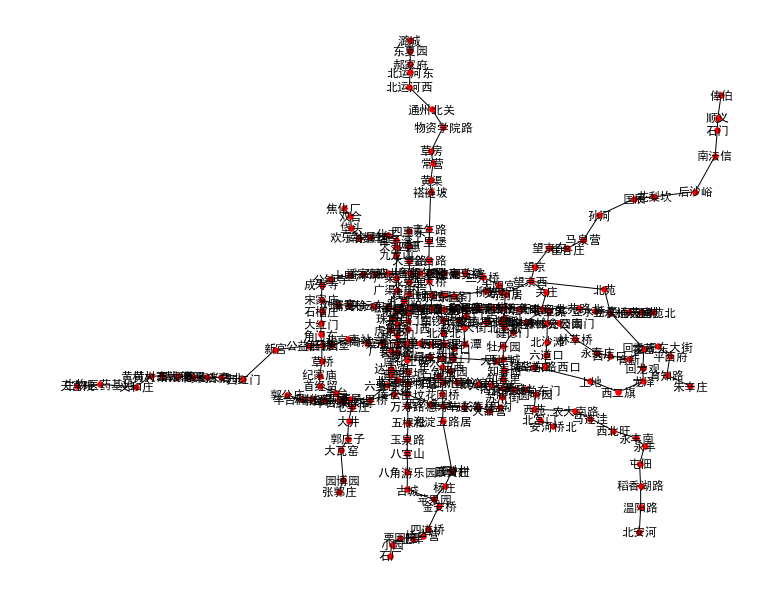

In [15]:
subway_graph = nx.Graph(station_map)
figure = nx.draw(subway_graph, station_location, with_labels=True, node_size=30)
plt.rcParams['figure.figsize'] = (12.0, 10.0)  # 调整画布大小

In [74]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

def search(connection_graph, start, destination, sort_candidate):
    pathes = [[start]]
    
    visited = set()
    
    while pathes:  
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visited: continue
        successors = connection_graph[froninter]
        
        for city in successors:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: 
                for i in range(len(new_path)):
                    print(new_path[i], end='')
                    if i != len(new_path)-1:
                        print('->', end = '')
                return new_path
        visited.add(froninter)
        pathes = sort_candidate(pathes)

In [75]:
t = search(station_map, '奥体中心','天安门东',transfer_stations_first)

奥体中心->北土城->安华桥->安德里北街->鼓楼大街->什刹海->南锣鼓巷->东四->灯市口->东单->王府井->天安门东